In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('true_car_listings.csv')

In [ ]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [ ]:
df.tail()

,Price,Year,Mileage,City,State,Vin,Make,Model
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90
852121,76995,2017,2502,New York,NY,YV4BC0ZX1H1109845,Volvo,XC90T8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [ ]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [ ]:
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

In [ ]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR =Q3-Q1
print(IQR)

Price      13995.0
Year           4.0
Mileage    48350.0
dtype: float64


In [ ]:
df=df[-((df<(Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 *IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(770733, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


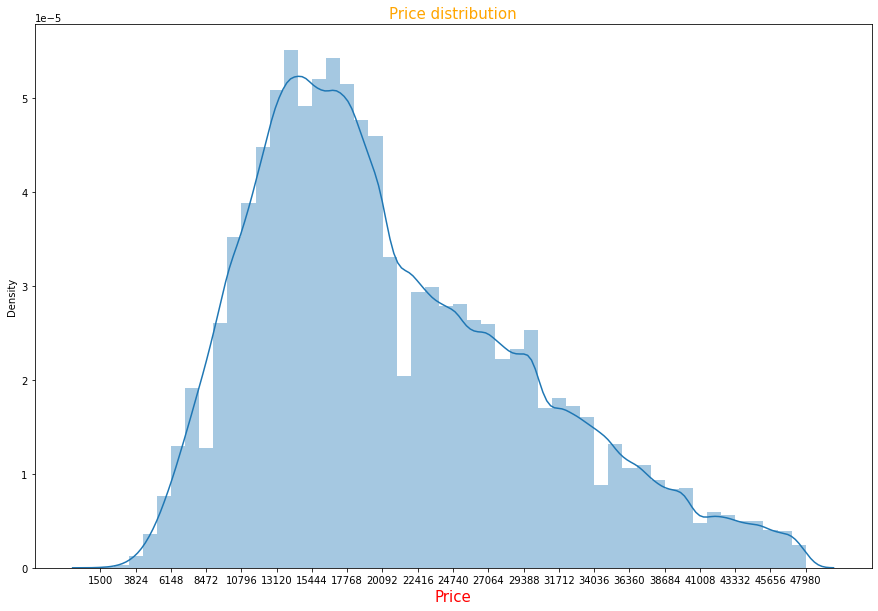

In [ ]:
plt.figure (figsize=(15,10))
mins=df.Price.min()
maxs=df.Price.max()
scale=(maxs-mins)/20
sns.distplot(x=df['Price'])
plt.xlabel('Price',size=15, color='red')
plt.title('Price distribution',size=15,color='Orange')
plt.xticks(list(range(mins,maxs,int(scale))))
plt.show()

In [ ]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include=[object])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat.head()

,City,State,Vin,Make,Model
0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [ ]:
encoded_cat= df_cat.apply(le.fit_transform)
encoded_cat

,City,State,Vin,Make,Model
0,646,49,3605,0,932
1,1259,39,3341,0,931
2,646,49,3603,0,932
3,2489,6,3458,0,931
4,1230,50,16,0,934
...,...,...,...,...,...
852076,1812,35,764229,47,1917
852089,1396,11,762874,47,1610
852108,2005,5,763144,47,1916
852111,2005,5,763241,47,1916


In [ ]:
df = pd.concat([df_num,encoded_cat],axis=1)
df

,Price,Year,Mileage,Cluster_0,Cluster_1,Cluster_2,City,State,Vin,Make,Model
0,8995,2014,35725,1,0,0,646,49,3605,0,932
1,10888,2013,19606,1,0,0,1259,39,3341,0,931
2,8995,2013,48851,1,0,0,646,49,3603,0,932
3,10999,2014,39922,1,0,0,2489,6,3458,0,931
4,14799,2016,22142,1,0,0,1230,50,16,0,934
...,...,...,...,...,...,...,...,...,...,...,...
852076,37999,2016,10801,0,0,1,1812,35,764229,47,1917
852089,44565,2016,5650,0,0,1,1396,11,762874,47,1610
852108,45280,2017,8,0,0,1,2005,5,763144,47,1916
852111,46500,2017,8,0,0,1,2005,5,763241,47,1916


In [ ]:
X = df[['Price','Year']]
X = np.array(X)
X.shape

(770733, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)
X_scaled

array([[-1.28418634,  0.07756513],
       [-1.07742345, -0.31055159],
       [-1.28418634, -0.31055159],
       ...,
       [ 2.67904211,  1.24191529],
       [ 2.81229659,  1.24191529],
       [ 2.81557334,  1.24191529]])

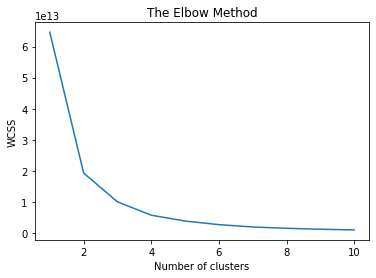

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Using the elbow method to find the optimal number of clusters

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#Fitting K-Means to the dataset

In [ ]:
y_kmeans

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(770733, 2)

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 3, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 3, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 3, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 5, c = 'yellow', label = 'Centroids')
plt.title('Clusters of cars')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.legend()
plt.show()

In [ ]:
kmeans.inertia_

10050167696722.355

In [ ]:
df.head()

,Price,Year,Mileage,Cluster_0,Cluster_1,Cluster_2,City,State,Vin,Make,Model,clusters
0,8995,2014,35725,1,0,0,646,49,3605,0,932,0
1,10888,2013,19606,1,0,0,1259,39,3341,0,931,0
2,8995,2013,48851,1,0,0,646,49,3603,0,932,0
3,10999,2014,39922,1,0,0,2489,6,3458,0,931,0
4,14799,2016,22142,1,0,0,1230,50,16,0,934,0


In [ ]:
#Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)
X_scaled

array([[ 0.07756513, -0.35692387,  1.12567394, ..., -1.61276224,
        -0.11248169, -0.99410512],
       [-0.31055159, -0.86226334,  1.12567394, ..., -1.61276224,
        -0.11411562, -0.99410512],
       [-0.31055159,  0.05458341,  1.12567394, ..., -1.61276224,
        -0.11248169, -0.99410512],
       ...,
       [ 1.24191529, -1.47667136, -0.88835671, ...,  1.85335314,
         1.495306  ,  1.61649285],
       [ 1.24191529, -1.47667136, -0.88835671, ...,  1.85335314,
         1.495306  ,  1.61649285],
       [ 1.24191529, -1.47660865, -0.88835671, ...,  1.85335314,
         1.495306  ,  1.61649285]])

In [ ]:
X = df.drop(['Price','Vin'],axis =1)
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)
metrics.r2_score(y_train,y_pred)
#on train data

0.8586981800389554

In [ ]:
y_pred = lr.predict(X_test)
metrics.r2_score(y_test,y_pred)
#on test data

0.8591968907493969

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

3433.0544471216353

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2786.379593430597
MSE: 11785862.836901639
RMSE: 3433.0544471216353


In [ ]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,55,60,80,100]}
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 55, 60, 80, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
ridge=Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
predict = ridge.predict(X_test)

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(f'Train Score : {ridge.score(X_train, y_train) * 100:.2f}% and Test Score : {ridge.score(X_test, y_test) * 100:.2f}% using Ridge Regressor.')
print('r2 score:',metrics.r2_score(y_test,y_pred))

MAE: 2786.379593430597
MSE: 11785862.836901639
RMSE: 3433.0544471216353
Train Score : 85.87% and Test Score : 85.92% using Ridge Regressor.
r2 score: 0.8591968907493969


In [ ]:
 from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.071e+11, tolerance: 5.170e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

In [ ]:
alpha =0.1
lasso = Lasso(alpha=0.1)      
lasso.fit(X_train, y_train) 
lasso.coef_
ls_pred = lasso_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.071e+11, tolerance: 5.170e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,ls_pred))
print('MSE:',metrics.mean_squared_error(y_test,ls_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,ls_pred)))
print(f'Train Score : {lasso_reg.score(X_train, y_train) * 100:.2f}% and Test Score : {lasso_reg.score(X_test, y_test) * 100:.2f}% using Lasso Regressor.')
print('r2 score:',metrics.r2_score(y_test,ls_pred))

MAE: 2786.638694164732
MSE: 11786232.893656554
RMSE: 3433.1083428369334
Train Score : 85.87% and Test Score : 85.92% using Lasso Regressor.
r2 score: 0.8591924697627952
